In [1]:
import os
import tensorflow as tf
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Reshape, Dense, Dropout, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D, UpSampling2D
from tensorflow.keras.datasets import mnist as mnist
from tensorflow.keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras import backend as K
from tensorflow.keras import initializers, regularizers
K.set_image_data_format('channels_first')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 128, 7, 7)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 7, 7)         409728    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 7, 7)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 128, 14, 14)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 14, 14)        2


--------------- Epoch 2 ---------------



--------------- Epoch 3 ---------------



--------------- Epoch 4 ---------------



--------------- Epoch 5 ---------------



--------------- Epoch 6 ---------------



--------------- Epoch 7 ---------------



--------------- Epoch 8 ---------------



--------------- Epoch 9 ---------------



--------------- Epoch 10 ---------------



--------------- Epoch 11 ---------------



--------------- Epoch 12 ---------------



--------------- Epoch 13 ---------------



--------------- Epoch 14 ---------------



--------------- Epoch 15 ---------------



--------------- Epoch 16 ---------------



--------------- Epoch 17 ---------------



--------------- Epoch 18 ---------------



--------------- Epoch 19 ---------------



--------------- Epoch 20 ---------------



--------------- Epoch 21 ---------------



--------------- Epoch 22 ---------------



--------------- Epoch 23 ---------------



--------------- Epoch 24 ---------------



--------------- Epoch 25 ---------------



--------------- Epoch 26 ---------------



--------------- Epoch 27 ---------------



--------------- Epoch 28 ---------------



--------------- Epoch 29 ---------------



--------------- Epoch 30 ---------------



--------------- Epoch 31 ---------------



--------------- Epoch 32 ---------------



--------------- Epoch 33 ---------------



--------------- Epoch 34 ---------------



--------------- Epoch 35 ---------------



--------------- Epoch 36 ---------------



--------------- Epoch 37 ---------------



--------------- Epoch 38 ---------------



--------------- Epoch 39 ---------------



--------------- Epoch 40 ---------------



--------------- Epoch 41 ---------------



--------------- Epoch 42 ---------------



--------------- Epoch 43 ---------------



--------------- Epoch 44 ---------------



--------------- Epoch 45 ---------------



--------------- Epoch 46 ---------------



--------------- Epoch 47 ---------------



--------------- Epoch 48 ---------------



--------------- Epoch 49 ---------------



--------------- Epoch 50 ---------------



--------------- Epoch 51 ---------------



--------------- Epoch 52 ---------------



--------------- Epoch 53 ---------------



--------------- Epoch 54 ---------------



--------------- Epoch 55 ---------------



--------------- Epoch 56 ---------------



--------------- Epoch 57 ---------------



--------------- Epoch 58 ---------------



--------------- Epoch 59 ---------------



--------------- Epoch 60 ---------------



--------------- Epoch 61 ---------------



--------------- Epoch 62 ---------------



--------------- Epoch 63 ---------------



--------------- Epoch 64 ---------------



--------------- Epoch 65 ---------------



--------------- Epoch 66 ---------------



--------------- Epoch 67 ---------------



--------------- Epoch 68 ---------------



--------------- Epoch 69 ---------------



--------------- Epoch 70 ---------------



--------------- Epoch 71 ---------------



--------------- Epoch 72 ---------------



--------------- Epoch 73 ---------------



--------------- Epoch 74 ---------------



--------------- Epoch 75 ---------------



--------------- Epoch 76 ---------------



--------------- Epoch 77 ---------------



--------------- Epoch 78 ---------------



--------------- Epoch 79 ---------------



--------------- Epoch 80 ---------------



--------------- Epoch 81 ---------------



--------------- Epoch 82 ---------------



--------------- Epoch 83 ---------------



--------------- Epoch 84 ---------------



--------------- Epoch 85 ---------------



--------------- Epoch 86 ---------------



--------------- Epoch 87 ---------------



--------------- Epoch 88 ---------------



--------------- Epoch 89 ---------------



--------------- Epoch 90 ---------------



--------------- Epoch 91 ---------------



--------------- Epoch 92 ---------------



--------------- Epoch 93 ---------------



--------------- Epoch 94 ---------------



--------------- Epoch 95 ---------------



--------------- Epoch 96 ---------------



--------------- Epoch 97 ---------------



--------------- Epoch 98 ---------------



--------------- Epoch 99 ---------------



--------------- Epoch 100 ---------------



--------------- Epoch 101 ---------------



--------------- Epoch 102 ---------------



--------------- Epoch 103 ---------------



--------------- Epoch 104 ---------------



--------------- Epoch 105 ---------------



--------------- Epoch 106 ---------------



--------------- Epoch 107 ---------------



--------------- Epoch 108 ---------------



--------------- Epoch 109 ---------------



--------------- Epoch 110 ---------------



--------------- Epoch 111 ---------------



--------------- Epoch 112 ---------------



--------------- Epoch 113 ---------------



--------------- Epoch 114 ---------------



--------------- Epoch 115 ---------------



--------------- Epoch 116 ---------------



--------------- Epoch 117 ---------------



--------------- Epoch 118 ---------------



--------------- Epoch 119 ---------------



--------------- Epoch 120 ---------------



--------------- Epoch 121 ---------------



--------------- Epoch 122 ---------------



--------------- Epoch 123 ---------------



--------------- Epoch 124 ---------------



--------------- Epoch 125 ---------------



--------------- Epoch 126 ---------------



--------------- Epoch 127 ---------------



--------------- Epoch 128 ---------------



--------------- Epoch 129 ---------------



--------------- Epoch 130 ---------------



--------------- Epoch 131 ---------------



--------------- Epoch 132 ---------------



--------------- Epoch 133 ---------------



--------------- Epoch 134 ---------------



--------------- Epoch 135 ---------------



--------------- Epoch 136 ---------------



--------------- Epoch 137 ---------------



--------------- Epoch 138 ---------------



--------------- Epoch 139 ---------------



--------------- Epoch 140 ---------------



--------------- Epoch 141 ---------------



--------------- Epoch 142 ---------------



--------------- Epoch 143 ---------------



--------------- Epoch 144 ---------------



--------------- Epoch 145 ---------------



--------------- Epoch 146 ---------------



--------------- Epoch 147 ---------------



--------------- Epoch 148 ---------------



--------------- Epoch 149 ---------------



--------------- Epoch 150 ---------------


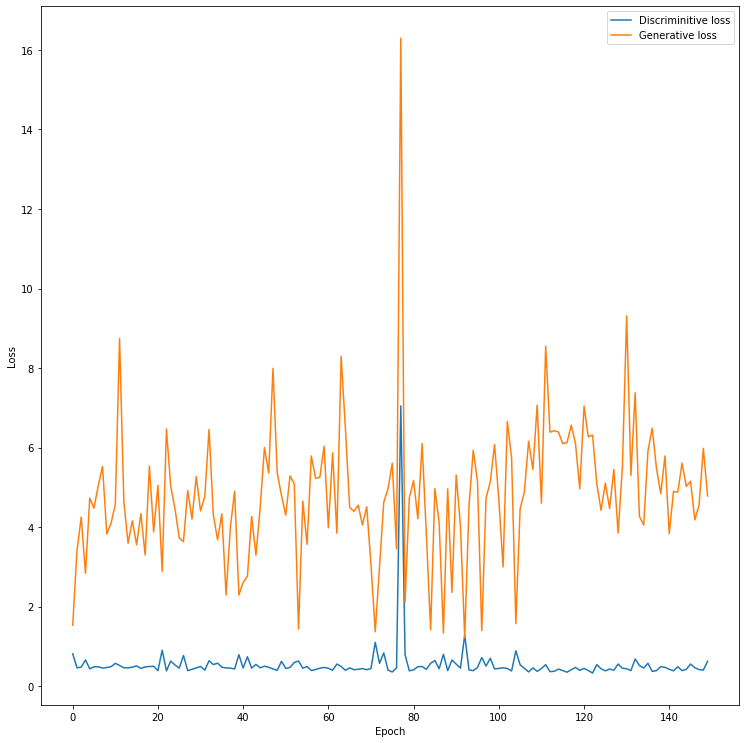

In [2]:
# 正則化なしの学習

# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 100

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train[:, np.newaxis, :, :]

# Optimizer
opt = Nadam(1e-3)

# Generator
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02), kernel_regularizer=regularizers.l2(1e-3)))
generator.add(LeakyReLU(0.2))
generator.add(Reshape((128, 7, 7)))
generator.add(Conv2D(128, kernel_size=(5, 5), padding='same', kernel_regularizer=regularizers.l2(1e-3)))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(64, kernel_size=(5, 5), padding='same', kernel_regularizer=regularizers.l2(1e-3)))
generator.add(LeakyReLU(0.2))
generator.add(Conv2D(64, kernel_size=(5, 5), padding='same', kernel_regularizer=regularizers.l2(1e-3)))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', kernel_regularizer=regularizers.l2(1e-3)))
generator.compile(loss='binary_crossentropy', optimizer=opt)
generator.summary()

# Discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', input_shape=(1, 28, 28), kernel_initializer=initializers.RandomNormal(stddev=0.02), kernel_regularizer=regularizers.l2(1e-3)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', kernel_regularizer=regularizers.l2(1e-3)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=(5, 5), strides=(2, 2), padding='same', kernel_regularizer=regularizers.l2(1e-3)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=(5, 5), strides=(2, 2), padding='same', kernel_regularizer=regularizers.l2(1e-3)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(1e-3)))
discriminator.compile(loss='binary_crossentropy', optimizer=opt)
discriminator.summary()

# Combined network
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
print(x.shape)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=opt)

dLosses = []
gLosses = []

# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure('canvas', figsize=(10, 8))
    plt.clf()
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('images/ldcgan_loss_epoch_%d.png' % epoch)

# Create a wall of generated MNIST images
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)

    plt.figure('canvas', figsize=figsize)
    plt.clf()
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i, 0], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/ldcgan_generated_image_epoch_%d.png' % epoch)

# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
    generator.save('models/ldcgan_generator_epoch_%d.h5' % epoch)
    discriminator.save('models/ldcgan_discriminator_epoch_%d.h5' % epoch)

def train(epochs=1, batchSize=128):
    batchCount = int(X_train.shape[0] / batchSize)
    print('Epochs:', epochs)
    print('Batch size:', batchSize)
    print('Batches per epoch:', batchCount)

    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(batchCount)):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # Generate fake MNIST images
            generatedImages = generator.predict(noise)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)

        if e == 1 or e % 5 == 0:
            plotGeneratedImages(e)
            saveModels(e)

    # Plot losses from every epoch
    plotLoss(e)

with tf.device('/gpu'):
    train(150, 128)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 128, 7, 7)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 7, 7)         409728    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 7, 7)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 128, 14, 14)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 14, 14)        2


--------------- Epoch 2 ---------------



--------------- Epoch 3 ---------------



--------------- Epoch 4 ---------------



--------------- Epoch 5 ---------------



--------------- Epoch 6 ---------------



--------------- Epoch 7 ---------------



--------------- Epoch 8 ---------------



--------------- Epoch 9 ---------------



--------------- Epoch 10 ---------------



--------------- Epoch 11 ---------------



--------------- Epoch 12 ---------------



--------------- Epoch 13 ---------------



--------------- Epoch 14 ---------------



--------------- Epoch 15 ---------------



--------------- Epoch 16 ---------------



--------------- Epoch 17 ---------------



--------------- Epoch 18 ---------------



--------------- Epoch 19 ---------------



--------------- Epoch 20 ---------------



--------------- Epoch 21 ---------------



--------------- Epoch 22 ---------------



--------------- Epoch 23 ---------------



--------------- Epoch 24 ---------------



--------------- Epoch 25 ---------------



--------------- Epoch 26 ---------------



--------------- Epoch 27 ---------------



--------------- Epoch 28 ---------------



--------------- Epoch 29 ---------------



--------------- Epoch 30 ---------------



--------------- Epoch 31 ---------------



--------------- Epoch 32 ---------------



--------------- Epoch 33 ---------------



--------------- Epoch 34 ---------------



--------------- Epoch 35 ---------------



--------------- Epoch 36 ---------------



--------------- Epoch 37 ---------------



--------------- Epoch 38 ---------------



--------------- Epoch 39 ---------------



--------------- Epoch 40 ---------------



--------------- Epoch 41 ---------------



--------------- Epoch 42 ---------------



--------------- Epoch 43 ---------------



--------------- Epoch 44 ---------------



--------------- Epoch 45 ---------------



--------------- Epoch 46 ---------------



--------------- Epoch 47 ---------------



--------------- Epoch 48 ---------------



--------------- Epoch 49 ---------------



--------------- Epoch 50 ---------------



--------------- Epoch 51 ---------------



--------------- Epoch 52 ---------------



--------------- Epoch 53 ---------------



--------------- Epoch 54 ---------------



--------------- Epoch 55 ---------------



--------------- Epoch 56 ---------------



--------------- Epoch 57 ---------------



--------------- Epoch 58 ---------------



--------------- Epoch 59 ---------------



--------------- Epoch 60 ---------------



--------------- Epoch 61 ---------------



--------------- Epoch 62 ---------------



--------------- Epoch 63 ---------------



--------------- Epoch 64 ---------------



--------------- Epoch 65 ---------------



--------------- Epoch 66 ---------------



--------------- Epoch 67 ---------------



--------------- Epoch 68 ---------------



--------------- Epoch 69 ---------------



--------------- Epoch 70 ---------------



--------------- Epoch 71 ---------------



--------------- Epoch 72 ---------------



--------------- Epoch 73 ---------------



--------------- Epoch 74 ---------------



--------------- Epoch 75 ---------------



--------------- Epoch 76 ---------------



--------------- Epoch 77 ---------------



--------------- Epoch 78 ---------------



--------------- Epoch 79 ---------------



--------------- Epoch 80 ---------------



--------------- Epoch 81 ---------------



--------------- Epoch 82 ---------------



--------------- Epoch 83 ---------------



--------------- Epoch 84 ---------------



--------------- Epoch 85 ---------------



--------------- Epoch 86 ---------------



--------------- Epoch 87 ---------------



--------------- Epoch 88 ---------------



--------------- Epoch 89 ---------------



--------------- Epoch 90 ---------------



--------------- Epoch 91 ---------------



--------------- Epoch 92 ---------------



--------------- Epoch 93 ---------------



--------------- Epoch 94 ---------------



--------------- Epoch 95 ---------------



--------------- Epoch 96 ---------------



--------------- Epoch 97 ---------------



--------------- Epoch 98 ---------------



--------------- Epoch 99 ---------------



--------------- Epoch 100 ---------------



--------------- Epoch 101 ---------------



--------------- Epoch 102 ---------------



--------------- Epoch 103 ---------------



--------------- Epoch 104 ---------------



--------------- Epoch 105 ---------------



--------------- Epoch 106 ---------------



--------------- Epoch 107 ---------------



--------------- Epoch 108 ---------------



--------------- Epoch 109 ---------------



--------------- Epoch 110 ---------------



--------------- Epoch 111 ---------------



--------------- Epoch 112 ---------------



--------------- Epoch 113 ---------------



--------------- Epoch 114 ---------------



--------------- Epoch 115 ---------------



--------------- Epoch 116 ---------------



--------------- Epoch 117 ---------------



--------------- Epoch 118 ---------------



--------------- Epoch 119 ---------------



--------------- Epoch 120 ---------------



--------------- Epoch 121 ---------------



--------------- Epoch 122 ---------------



--------------- Epoch 123 ---------------



--------------- Epoch 124 ---------------



--------------- Epoch 125 ---------------



--------------- Epoch 126 ---------------



--------------- Epoch 127 ---------------



--------------- Epoch 128 ---------------



--------------- Epoch 129 ---------------



--------------- Epoch 130 ---------------



--------------- Epoch 131 ---------------



--------------- Epoch 132 ---------------



--------------- Epoch 133 ---------------



--------------- Epoch 134 ---------------



--------------- Epoch 135 ---------------



--------------- Epoch 136 ---------------



--------------- Epoch 137 ---------------



--------------- Epoch 138 ---------------



--------------- Epoch 139 ---------------



--------------- Epoch 140 ---------------



--------------- Epoch 141 ---------------



--------------- Epoch 142 ---------------



--------------- Epoch 143 ---------------



--------------- Epoch 144 ---------------



--------------- Epoch 145 ---------------



--------------- Epoch 146 ---------------



--------------- Epoch 147 ---------------



--------------- Epoch 148 ---------------



--------------- Epoch 149 ---------------



--------------- Epoch 150 ---------------


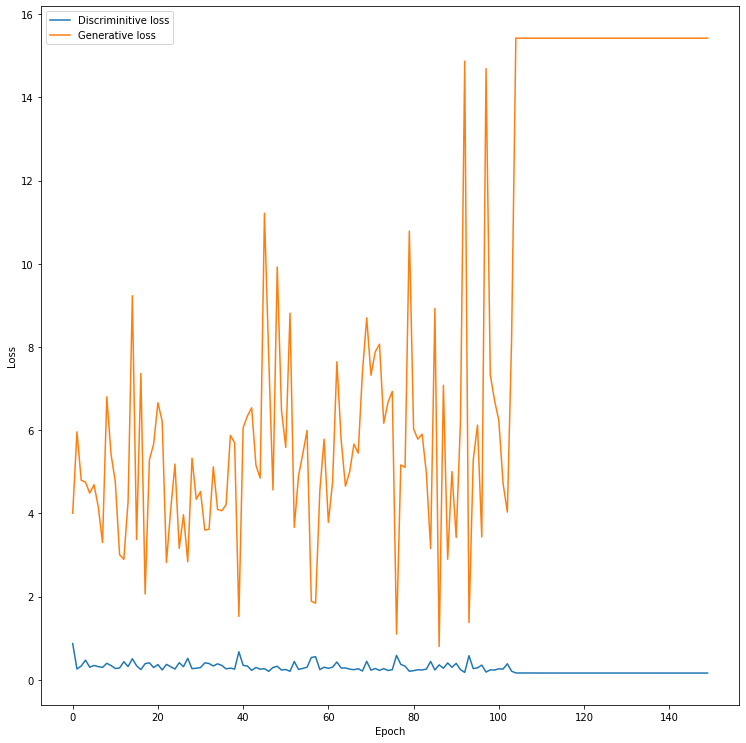

In [2]:
# L2正則化の学習

# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 100

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train[:, np.newaxis, :, :]

# Optimizer
opt = Nadam(1e-3)

# Generator
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Reshape((128, 7, 7)))
generator.add(Conv2D(128, kernel_size=(5, 5), padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(64, kernel_size=(5, 5), padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(Conv2D(64, kernel_size=(5, 5), padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same'))
generator.compile(loss='binary_crossentropy', optimizer=opt)
generator.summary()

# Discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', input_shape=(1, 28, 28), kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=(5, 5), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=(5, 5), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=opt)
discriminator.summary()

# Combined network
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
print(x.shape)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=opt)

dLosses = []
gLosses = []

# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure('canvas', figsize=(10, 8))
    plt.clf()
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('images/rdcgan_loss_epoch_%d.png' % epoch)

# Create a wall of generated MNIST images
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)

    plt.figure('canvas', figsize=figsize)
    plt.clf()
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i, 0], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/rdcgan_generated_image_epoch_%d.png' % epoch)

# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
    generator.save('models/rdcgan_generator_epoch_%d.h5' % epoch)
    discriminator.save('models/rdcgan_discriminator_epoch_%d.h5' % epoch)

def train(epochs=1, batchSize=128):
    batchCount = int(X_train.shape[0] / batchSize)
    print('Epochs:', epochs)
    print('Batch size:', batchSize)
    print('Batches per epoch:', batchCount)

    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(batchCount)):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # Generate fake MNIST images
            generatedImages = generator.predict(noise)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)

        if e == 1 or e % 5 == 0:
            plotGeneratedImages(e)
            saveModels(e)

    # Plot losses from every epoch
    plotLoss(e)

with tf.device('/gpu'):
    train(150, 128)

正則化つきレイヤーの読み込み，および学習

In [2]:
%run Regular.ipynb
Dense = RegDense
Conv2D = RegConv2D

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reg_dense (RegDense)         (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 128, 7, 7)         0         
_________________________________________________________________
reg_conv2d (RegConv2D)       (None, 128, 7, 7)         409728    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 7, 7)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 128, 14, 14)       0         
_________________________________________________________________
reg_conv2d_1 (RegConv2D)     (None, 64, 14, 14)        2


--------------- Epoch 2 ---------------



--------------- Epoch 3 ---------------



--------------- Epoch 4 ---------------



--------------- Epoch 5 ---------------



--------------- Epoch 6 ---------------



--------------- Epoch 7 ---------------



--------------- Epoch 8 ---------------



--------------- Epoch 9 ---------------



--------------- Epoch 10 ---------------



--------------- Epoch 11 ---------------



--------------- Epoch 12 ---------------



--------------- Epoch 13 ---------------



--------------- Epoch 14 ---------------



--------------- Epoch 15 ---------------



--------------- Epoch 16 ---------------



--------------- Epoch 17 ---------------



--------------- Epoch 18 ---------------



--------------- Epoch 19 ---------------



--------------- Epoch 20 ---------------



--------------- Epoch 21 ---------------



--------------- Epoch 22 ---------------



--------------- Epoch 23 ---------------



--------------- Epoch 24 ---------------



--------------- Epoch 25 ---------------



--------------- Epoch 26 ---------------



--------------- Epoch 27 ---------------



--------------- Epoch 28 ---------------



--------------- Epoch 29 ---------------



--------------- Epoch 30 ---------------



--------------- Epoch 31 ---------------



--------------- Epoch 32 ---------------



--------------- Epoch 33 ---------------



--------------- Epoch 34 ---------------



--------------- Epoch 35 ---------------



--------------- Epoch 36 ---------------



--------------- Epoch 37 ---------------



--------------- Epoch 38 ---------------



--------------- Epoch 39 ---------------



--------------- Epoch 40 ---------------



--------------- Epoch 41 ---------------



--------------- Epoch 42 ---------------



--------------- Epoch 43 ---------------



--------------- Epoch 44 ---------------



--------------- Epoch 45 ---------------



--------------- Epoch 46 ---------------



--------------- Epoch 47 ---------------



--------------- Epoch 48 ---------------



--------------- Epoch 49 ---------------



--------------- Epoch 50 ---------------



--------------- Epoch 51 ---------------



--------------- Epoch 52 ---------------



--------------- Epoch 53 ---------------



--------------- Epoch 54 ---------------



--------------- Epoch 55 ---------------



--------------- Epoch 56 ---------------



--------------- Epoch 57 ---------------



--------------- Epoch 58 ---------------



--------------- Epoch 59 ---------------



--------------- Epoch 60 ---------------



--------------- Epoch 61 ---------------



--------------- Epoch 62 ---------------



--------------- Epoch 63 ---------------



--------------- Epoch 64 ---------------



--------------- Epoch 65 ---------------



--------------- Epoch 66 ---------------



--------------- Epoch 67 ---------------



--------------- Epoch 68 ---------------



--------------- Epoch 69 ---------------



--------------- Epoch 70 ---------------



--------------- Epoch 71 ---------------



--------------- Epoch 72 ---------------



--------------- Epoch 73 ---------------



--------------- Epoch 74 ---------------



--------------- Epoch 75 ---------------



--------------- Epoch 76 ---------------



--------------- Epoch 77 ---------------



--------------- Epoch 78 ---------------



--------------- Epoch 79 ---------------



--------------- Epoch 80 ---------------



--------------- Epoch 81 ---------------



--------------- Epoch 82 ---------------



--------------- Epoch 83 ---------------



--------------- Epoch 84 ---------------



--------------- Epoch 85 ---------------



--------------- Epoch 86 ---------------



--------------- Epoch 87 ---------------



--------------- Epoch 88 ---------------



--------------- Epoch 89 ---------------



--------------- Epoch 90 ---------------



--------------- Epoch 91 ---------------



--------------- Epoch 92 ---------------



--------------- Epoch 93 ---------------



--------------- Epoch 94 ---------------



--------------- Epoch 95 ---------------



--------------- Epoch 96 ---------------



--------------- Epoch 97 ---------------



--------------- Epoch 98 ---------------



--------------- Epoch 99 ---------------



--------------- Epoch 100 ---------------



--------------- Epoch 101 ---------------



--------------- Epoch 102 ---------------



--------------- Epoch 103 ---------------



--------------- Epoch 104 ---------------



--------------- Epoch 105 ---------------



--------------- Epoch 106 ---------------



--------------- Epoch 107 ---------------



--------------- Epoch 108 ---------------



--------------- Epoch 109 ---------------



--------------- Epoch 110 ---------------



--------------- Epoch 111 ---------------



--------------- Epoch 112 ---------------



--------------- Epoch 113 ---------------



--------------- Epoch 114 ---------------



--------------- Epoch 115 ---------------



--------------- Epoch 116 ---------------



--------------- Epoch 117 ---------------



--------------- Epoch 118 ---------------



--------------- Epoch 119 ---------------



--------------- Epoch 120 ---------------



--------------- Epoch 121 ---------------



--------------- Epoch 122 ---------------



--------------- Epoch 123 ---------------



--------------- Epoch 124 ---------------



--------------- Epoch 125 ---------------



--------------- Epoch 126 ---------------



--------------- Epoch 127 ---------------



--------------- Epoch 128 ---------------



--------------- Epoch 129 ---------------



--------------- Epoch 130 ---------------



--------------- Epoch 131 ---------------



--------------- Epoch 132 ---------------



--------------- Epoch 133 ---------------



--------------- Epoch 134 ---------------



--------------- Epoch 135 ---------------



--------------- Epoch 136 ---------------



--------------- Epoch 137 ---------------



--------------- Epoch 138 ---------------



--------------- Epoch 139 ---------------



--------------- Epoch 140 ---------------



--------------- Epoch 141 ---------------



--------------- Epoch 142 ---------------



--------------- Epoch 143 ---------------



--------------- Epoch 144 ---------------



--------------- Epoch 145 ---------------



--------------- Epoch 146 ---------------



--------------- Epoch 147 ---------------



--------------- Epoch 148 ---------------



--------------- Epoch 149 ---------------



--------------- Epoch 150 ---------------


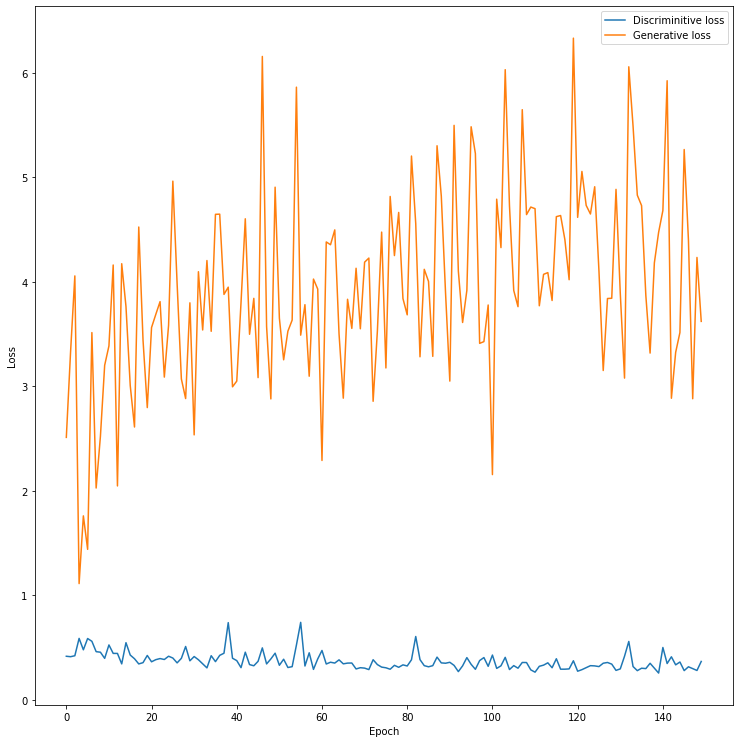

In [3]:
# 特異値を正則化した学習

# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 100

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train[:, np.newaxis, :, :]

# Optimizer
opt = Nadam(1e-3)

# Generator
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Reshape((128, 7, 7)))
generator.add(Conv2D(128, kernel_size=(5, 5), padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(64, kernel_size=(5, 5), padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(Conv2D(64, kernel_size=(5, 5), padding='same'))
generator.add(LeakyReLU(0.2))
generator.add(UpSampling2D(size=(2, 2)))
generator.add(Conv2D(1, kernel_size=(5, 5), padding='same'))
generator.compile(loss='binary_crossentropy', optimizer=opt)
generator.summary()

# Discriminator
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', input_shape=(1, 28, 28), kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=(5, 5), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=(5, 5), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=opt)
discriminator.summary()

# Combined network
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
print(x.shape)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=opt)

dLosses = []
gLosses = []

# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure('canvas', figsize=(10, 8))
    plt.clf()
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('images/qdcgan_loss_epoch_%d.png' % epoch)

# Create a wall of generated MNIST images
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)

    plt.figure('canvas', figsize=figsize)
    plt.clf()
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i, 0], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/qdcgan_generated_image_epoch_%d.png' % epoch)

# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
    generator.save('models/qdcgan_generator_epoch_%d.h5' % epoch)
    discriminator.save('models/qdcgan_discriminator_epoch_%d.h5' % epoch)

def train(epochs=1, batchSize=128):
    batchCount = int(X_train.shape[0] / batchSize)
    print('Epochs:', epochs)
    print('Batch size:', batchSize)
    print('Batches per epoch:', batchCount)

    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(batchCount)):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # Generate fake MNIST images
            generatedImages = generator.predict(noise)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)

        if e == 1 or e % 5 == 0:
            plotGeneratedImages(e)
            saveModels(e)

    # Plot losses from every epoch
    plotLoss(e)

with tf.device('/gpu'):
    train(150, 128)

In [296]:
from functools import reduce
def evalay(layer, f): # RegConv2D, RegDenseの場合には重み行列を評価する
    if isinstance(layer, RegConv2D):
        return f(layer.kmat)
    elif isinstance(layer, RegDense):
        return f(layer.kernel)
    else:
        return []
    
def sv(weight): # 特異値を評価
    return list(tf.linalg.svd(weight, compute_uv=False).numpy())

def nl(weight): # 各フィルタのノルムを評価(WIP: 行列の次数が大きいほうでreduce_sumをする必要あり)
    return list(tf.reduce_sum(tf.square(weight), axis=1).numpy())

def mn(weight): # 特異値を経てノルムを評価
    return [tf.math.exp(tf.reduce_mean(tf.math.log(sv(weight)))).numpy()]

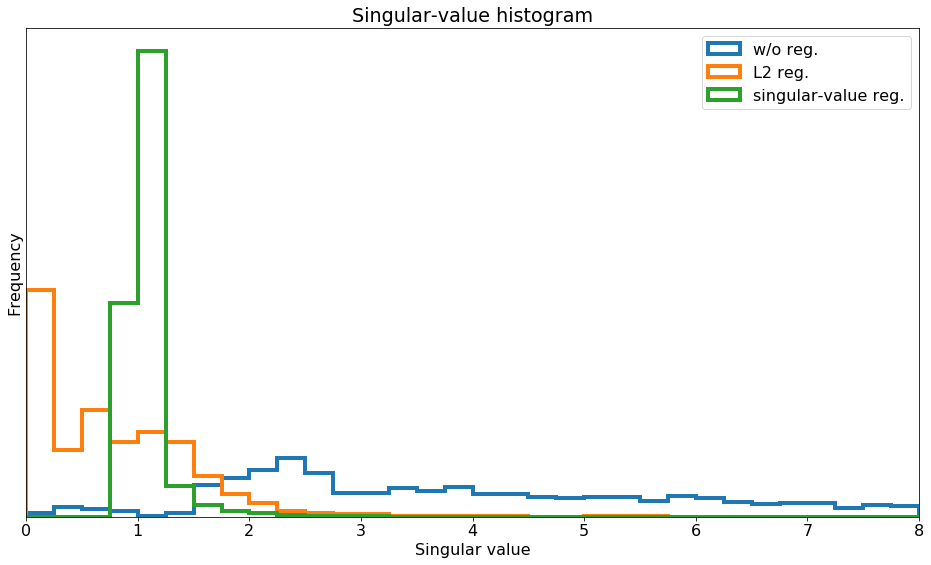

In [339]:
# 特異値のヒストグラム
from matplotlib.pylab import figure, clf, draw, hist, title, legend, xlabel, ylabel, xlim, ylim, yticks
# figure('0', figsize=(16, 9)); clf()
# figure('1', figsize=(16, 9)); clf()

figure('singular-value histogram', figsize=(16, 9))
clf()
rc('font', size=16)
for name in 'rlq':
    generator.load_weights('models/%sdcgan_generator_epoch_150.h5'%name)
    discriminator.load_weights('models/%sdcgan_discriminator_epoch_150.h5'%name)
    s = reduce(lambda a, x: a + evalay(x, sv), generator.layers + discriminator.layers, [])
    hist(s, bins=32, range=(0, 8), histtype='step', linewidth=4)

xlabel('Singular value')
ylabel('Frequency')
xlim([0, 8])
yticks([], [])
title('Singular-value histogram')
legend(['w/o reg.', 'L2 reg.', 'singular-value reg.'])
draw()

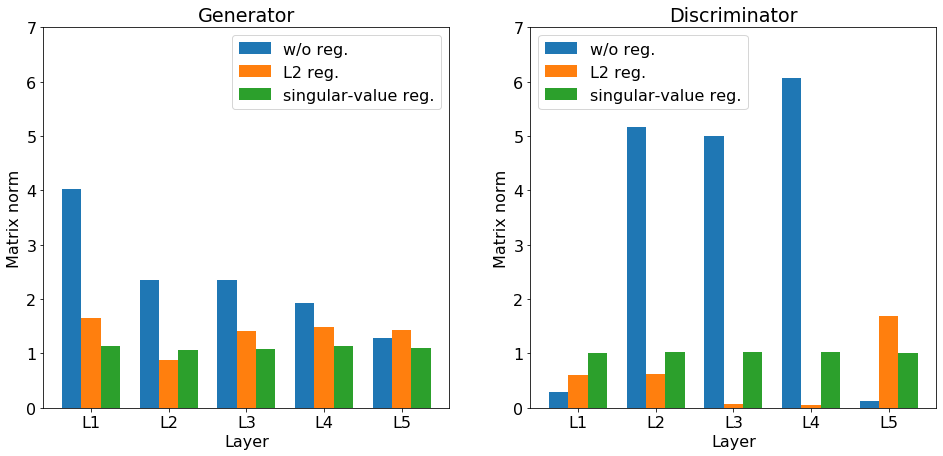

In [343]:
# 各種層のノルム
import warnings
warnings.filterwarnings('ignore')

from matplotlib.pylab import figure, clf, draw, hist, title, legend, plot, xticks, ylim, bar, arange, rc, ylabel, xlabel, subplot
titles = {'r': 'w/o reg.', 'l': 'L2 reg.', 'q': 'singular-value reg.'}
shifts = {'r': -0.25, 'l': 0.0, 'q': 0.25}
figure('Norm', figsize=(16, 7))
rc('font', size=16)
for name in 'rlq':
    generator.load_weights('models/%sdcgan_generator_epoch_150.h5'%name)
    discriminator.load_weights('models/%sdcgan_discriminator_epoch_150.h5'%name)
    
    subplot(1, 2, 1)
    s = reduce(lambda a, x: a + evalay(x, mn), generator.layers, [])
    bar(arange(len(s))+shifts[name], s, width=0.25)
    
    subplot(1, 2, 2)
    s = reduce(lambda a, x: a + evalay(x, mn), discriminator.layers, [])
    bar(arange(len(s))+shifts[name], s, width=0.25)
    
subplot(1, 2, 1)
xticks(range(len(s)), list(map(lambda n: 'L%d'%(n+1), range(len(s)))))
xlabel('Layer')
ylim([0, 7])
ylabel('Matrix norm')
title('Generator')
legend(titles.values())
draw()

subplot(1, 2, 2)
xticks(range(len(s)), list(map(lambda n: 'L%d'%(n+1), range(len(s)))))
xlabel('Layer')
ylim([0, 7])
ylabel('Matrix norm')
title('Discriminator')
legend(titles.values(), loc=2)